In [1]:
!pip install psycopg2 sqlalchemy

In [21]:
#Import pandas
import pandas as pd 

#Import SQLAlchemy
from sqlalchemy import create_engine, inspect

#Import matplotlib
import matplotlib.pyplot as plt

#Import Numpy
import numpy as np

from config import pkey

In [5]:
#Create Engine
url = "postgresql://postgres:" +pkey+"@localhost:5432/EmployeeSQL"
engine = create_engine(url)
connection = engine.connect()

In [12]:
#Query all record from database 
salaries_data = pd.read_sql("SELECT * FROM salaries", connection)
employees_data = pd.read_sql("SELECT * FROM employees", connection)
title_data = pd.read_sql("SELECT * FROM titles", connection)

In [13]:
title_data.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


Text(0.5, 0, 'Salary')

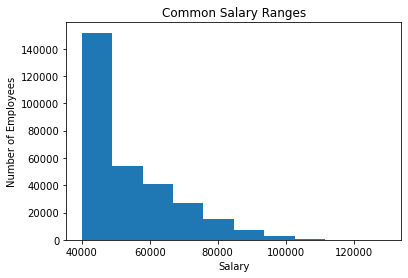

In [17]:
# Create a histogram to visualize the most common salary ranges for employees.
plt.hist(salaries_data["salary"], label="Salary")
plt.title("Common Salary Ranges")
plt.ylabel("Number of Employees")
plt.xlabel("Salary")



<function matplotlib.pyplot.show(*args, **kw)>

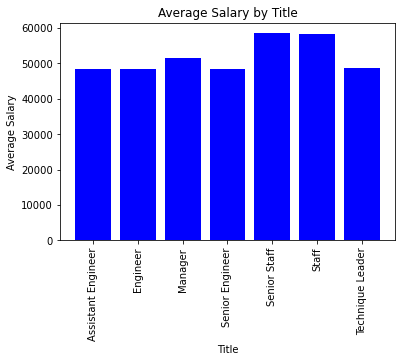

In [37]:
# Create a bar chart of average salary by title.
join = pd.read_sql("SELECT * FROM salaries JOIN employees ON (salaries.emp_number=employees.emp_number) JOIN titles ON (titles.title_id=employees.emp_title_id)", connection)
group_join = join.groupby(["title"]).mean()["salary"]
title = group_join.index
avg_salary = group_join.values

x_axis = np.arange(len(title))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, title, rotation = 90)
plt.bar(x_axis, avg_salary, color="b", align="center")
plt.title("Average Salary by Title")
plt.ylabel("Average Salary")
plt.xlabel("Title")
plt.show

In [27]:
inspector=inspect(engine)
inspector.get_columns('salaries')

[{'name': 'emp_number',
  'type': INTEGER(),
  'nullable': True,
  'default': None,
  'autoincrement': False,
  'comment': None},
 {'name': 'salary',
  'type': INTEGER(),
  'nullable': True,
  'default': None,
  'autoincrement': False,
  'comment': None}]